In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [67]:
data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')

import json
with open("E:\\My_projects\\gene_mistral_common.json", "r") as f:
    embeddings_data = json.load(f)

# Извлечение эмбеддингов
data = []
for item in embeddings_data:
    input_value = item['input']
    embedding_values = item['embedding']

    # Разбиваем embedding на отдельные значения
    embedding_list = []  # Создаем пустой список для значений эмбеддинга
    for value in embedding_values:  # Итерируем по элементам списка embedding_values
        embedding_list.append(float(value))  # Добавляем значения в список embedding_list

    # Создаем словарь для записи в DataFrame
    row_data = {'gene_sequence': input_value}
    for i, value in enumerate(embedding_list):
        row_data[f'embedding_{i+1}'] = value  # Добавляем значения в словарь row_data

    data.append(row_data)

# Создаем DataFrame
embs = pd.DataFrame(data)
embs
embs

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ivang\AppData\Local\Temp\ipykernel_22972\229485187.py:1: SyntaxWarning: invalid escape sequence '\M'
  data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')
C:\Users\ivang\AppData\Local\Temp\ipykernel_22972\229485187.py:1: DtypeWarning: Columns (2324) have mixed types. Specify dtype option on import or set low_memory=False.
  data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')


gene_sequence  embedding_1  \
0   TCTTCTTGGAGCGCTTTAGGCTGGCCGGCGGCGCTGGGAGGTGGAG...    -1.672852   
1   AGAAAAGCCAAGATTGGCATACAAGGGAGATAAGGAGCTCCTGCGA...    -3.068359   
2   ATTGGCGATGAGGTTCAGTCAATGGTGAAGAGGCTCTTGGCGGATT...     1.060547   
3   GTTCTCTCCTCTCGGAAGCTGCAGCCATGATGGAAGTTTGAGAGTT...    -1.705078   
4   ATTATTTAATAGAAATGCATTCTGCCAAGAACAGGTTTGTGCAAGC...    -3.673828   
5   GGGACGGCGCATGCCCACAGACCCGCCGGACGTCACGTGACACGCC...    -2.664062   
6   AGCGACACATCACACGGGCTCAACAGTGTAGTTGGTGTTCCTCGCA...     0.122620   
7   TTGCATTGGCTAAGGAACAATCTCGCGGAAGTGATATAAAAGCTCA...    -2.378906   
8   ACTTCATTTTCCCGTGATGCTTTGTGGTGTGACGTCAGCACAGCGC...    -1.961914   
9   AGGGGACCCATTCCTGGGAAATGGCACCCAGGTGGCATCATCTTGC...    -2.160156   
10  CGTTCGGCGTTATTATCGAGCTCCAAGACTATACAACACACATGAG...    -1.371094   
11  GCTCCCCGCGCTTTCTTAAGGCCCGCGGGCGGCGCAGGAGCGGCAC...    -0.642090   
12  GTGGCTCAGGGGGTGAATTTGAGAATGGACAAATTCAGGAACCAAG...    -3.439453   
13  AGGAGGCGGGACGCCCTCTAGCCTTTTTTCCTGCCCGGTACTTTCG...     2.005859   
14  ATCTTACGCTTACCGGTGCTGAGGGGAGTAGTCCGACTCCGCTCCA...    -4.351562   
15  AGCATCTTTCTTTCTCTTCCCATCCCACTCCCTTCCCCACACGCTC...    -2.275391   
16  AAACGCTTAAAAAGAGGAGCAACATGTAGGTGCCCAGTCTGATCAT...     0.039978   

    embedding_2  embedding_3  embedding_4  embedding_5  embedding_6  \
0      2.607422     1.716797    -6.019531    -4.046875    -9.773438   
1      1.346680     2.732422    -3.500000    -0.913086    -3.277344   
2      0.653320     4.875000    -5.812500    -6.742188    -3.910156   
3      3.294922     2.337891    -4.871094    -1.046875    -4.039062   
4      0.916016     4.238281    -0.810547     1.267578     0.553223   
5      2.919922     3.244141    -3.921875    -1.092773    -5.003906   
6      5.140625     2.869141    -5.730469    -4.593750   -10.664062   
7      3.099609     3.669922    -4.894531    -0.957031    -9.671875   
8      2.771484     2.210938    -5.796875    -2.105469    -9.031250   
9      2.070312     2.414062    -4.148438    -3.384766    -7.828125   
10     2.767578     2.222656    -4.718750    -3.074219    -7.953125   
11     4.117188     4.187500    -7.000000    -5.199219   -11.718750   
12     5.519531     3.046875    -2.425781    -0.124207     1.250000   
13     1.657227     3.408203    -9.031250    -2.300781    -5.988281   
14    -0.616211     6.488281    -2.359375    -2.494141    -8.554688   
15     4.308594     5.421875    -5.277344    -2.439453    -9.109375   
16     1.615234     0.822266    -3.480469    -3.542969    -7.007812   

    embedding_7  embedding_8  embedding_9  ...  embedding_4087  \
0     -4.132812     3.003906     3.265625  ...        8.851562   
1     -7.167969     3.824219     3.490234  ...       10.335938   
2     -6.628906    10.632812     1.723633  ...        7.070312   
3     -5.695312     4.003906    -2.906250  ...        9.703125   
4     -7.550781     9.500000     1.097656  ...        5.941406   
5     -5.773438     5.824219     2.066406  ...        9.281250   
6     -3.951172     5.410156     3.945312  ...        7.980469   
7     -5.085938     8.429688     3.333984  ...        5.175781   
8     -4.250000     3.478516     3.281250  ...        9.382812   
9     -4.402344     6.832031     0.317627  ...        5.828125   
10    -2.832031     3.570312     2.503906  ...        9.601562   
11    -3.660156     5.136719     3.095703  ...        8.734375   
12    -6.039062     3.107422    -2.062500  ...        9.398438   
13    -7.218750     8.257812     6.453125  ...        6.921875   
14    -4.402344     5.195312     3.246094  ...        8.664062   
15    -5.921875     8.984375     2.369141  ...        5.570312   
16    -6.378906     4.843750     1.635742  ...        8.671875   

    embedding_4088  embedding_4089  embedding_4090  embedding_4091  \
0        -0.051636        6.851562       -2.343750        2.781250   
1         4.968750        3.476562       -5.949219        3.808594   
2        -4.886719        2.960938       -5.125000        0.064453   
3        -1.972656        7.472

In [68]:
# Задаём имя колонки с генами
gene_column = 'gene_sequence'

# Проверяем наличие столбца gene в обоих датафреймах
if gene_column not in data_desc.columns:
    raise ValueError(f"Столбец '{gene_column}' не найден в первом датафрейме.")
if gene_column not in embs.columns:
    raise ValueError(f"Столбец '{gene_column}' не найден во втором датафрейме.")

# Проверяем уникальность столбца gene во втором датафрейме
if not embs[gene_column].is_unique:
    raise ValueError(f"Столбец '{gene_column}' во втором датафрейме не уникален. Убедитесь, что каждому значению гена соответствует только один набор эмбеддингов.")


# Слияние датафреймов по столбцу gene
merged_df = pd.merge(data_desc, embs, on=gene_column, how='left')

# Проверка на наличие NaN значений
if merged_df.isnull().any().any():
     na_count = merged_df.isnull().sum().sum()
     print(f"Предупреждение: {na_count} значения NaN были обнаружены в объединенном датасете. Проверьте, все ли значения генов из data1.csv присутствуют в data2.csv.")

In [69]:
def remove_trailing_period(value):
    if isinstance(value, str) and value.endswith('.'):
        return value[:-1]
    return value
merged_df['Concentration, nM'] = merged_df['Concentration, nM'].apply(remove_trailing_period).astype(float)
merged_df = merged_df[merged_df['Concentration, nM'] <= 100]
X = merged_df.loc[(merged_df['Efficacy, %'] <= 45) | (merged_df['Efficacy, %'] >= 55), :]
y = X['Efficacy, %']
X = X.drop(columns=['Efficacy, %', 'siRNA concentration', 'Unnamed: 0',	'SMDBid', 'Target gene', 'gene_sequence'])
X

desc_1   desc_2  desc_3  desc_4  desc_5  desc_6  desc_7  desc_8  \
0     341.967071  342.070    11.0     4.0     7.0     4.0     7.0    19.0   
1     341.967071  342.070    11.0     4.0     7.0     4.0     7.0    19.0   
2     341.967071  342.070    11.0     4.0     7.0     4.0     7.0    19.0   
3     341.967071  342.070    11.0     4.0     7.0     4.0     7.0    19.0   
4     341.967071  342.070    11.0     4.0     7.0     4.0     7.0    19.0   
...          ...      ...     ...     ...     ...     ...     ...     ...   
2643  522.990660  523.181    19.0     9.0     8.0     8.0    14.0    32.0   
2644  537.006310  537.208    19.0     9.0     8.0     8.0    14.0    33.0   
2645  522.990660  523.181    19.0     9.0     8.0     8.0    14.0    32.0   
2647  522.990660  523.181    19.0     9.0     8.0     8.0    14.0    32.0   
2648  522.990660  523.181    19.0     9.0     8.0     8.0    14.0    32.0   

      desc_9  desc_10  ...  embedding_4087  embedding_4088  embedding_4089  \
0       32.0     14.0  ...        8.851562       -0.051636        6.851562   
1       32.0     14.0  ...        8.851562       -0.051636        6.851562   
2       32.0     14.0  ...        8.851562       -0.051636        6.851562   
3       32.0     14.0  ...        8.851562       -0.051636        6.851562   
4       32.0     14.0  ...        8.851562       -0.051636        6.851562   
...      ...      ...  ...             ...             ...             ...   
2643    48.0     22.0  ...        9.398438        1.862305        5.824219   
2644    51.0     22.0  ...        9.398438        1.862305        5.824219   
2645    48.0     22.0  ...        9.398438        1.862305        5.824219   
2647    48.0     22.0  ...        9.398438        1.862305        5.824219   
2648    48.0     22.0  ...        9.398438        1.862305        5.824219   

      embedding_4090  embedding_4091  embedding_4092  embedding_4093  \
0          -2.343750         2.78125        0.742188        0.783203   
1          -2.343750         2.78125        0.742188        0.783203   
2          -2.343750         2.78125        0.742188        0.783203   
3          -2.343750         2.78125        0.742188        0.783203   
4          -2.343750         2.78125        0.742188        0.783203   
...              ...             ...             ...             ...   
2643       -3.316406         4.65625        2.623047       -2.548828   
2644       -3.316406         4.65625        2.623047       -2.548828   
2645       -3.316406         4.65625        2.623047       -2.548828   
2647       -3.316406         4.65625        2.623047       -2.548828   
2648       -3.316406         4.65625        2.623047       -2.548828   

      embedding_4094  embedding_4095  embedding_4096  
0           3.218750       -2.306641        1.617188  
1           3.218750       -2.306641        1.617188  
2           3.218750       -2.306641        1.617188  
3           3.218750       -2.306641        1.617188  
4           3.218750       -2.306641        1.617188  
...              ...             ...             ...  
2643        6.742188       -3.642578        2.503906  
2644        6.742188       -3.642578        2.503906  
2645        6.742188       -3.642578        2.503906  
2647        6.742188       -3.642578        2.503906  
2648        6.742188       -3.642578        2.503906  

[2402 rows x 6423 columns]

In [70]:
X = X.rename(columns={'Concentration, nM': 'Concentration_nM', 'Cell or Organism used': 'Cell_or_Organism_used', 'Transfection method': 'Transfection_method', 
                      'Experiment used to check activity': 'Experiment_used_to_check_activity', 'Duration after transfection': 'Duration_after_transfection'})

In [71]:
from sklearn.preprocessing import RobustScaler
def data_prep(X, y):
    X_scaled = X.drop(columns=['Concentration_nM',
                   'Cell_or_Organism_used',
                     'Transfection_method',
                     'Experiment_used_to_check_activity',
                     'Duration_after_transfection']).copy()
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



    return X_train, X_test, y_train, y_test

def adjusted_r2_score(r2, n, p):
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

# %%
from sklearn.metrics import mean_squared_error, r2_score
def cross_val_score1(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True)
    r2_scores = []
    adj_r2_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        n = X_test.shape[0]
        p = X_test.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        r2_scores.append(r2)
        adj_r2_scores.append(adj_r2)

    return r2_scores

In [72]:
def categorize_value(value):
  if 0 <= value <= 45:
    return 1
  elif 55 <= value <= 100:
    return 2
  else:
    return None
y = y.apply(categorize_value)

In [73]:
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_valid, y_train, y_valid = data_prep(X, y)
# Создание модели LightGBM (классификатор)
model = lgb.LGBMClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тренировочном и валидационном наборах
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
# classification_report
print("Train:")
print(classification_report(y_train, y_train_pred))

print("\nValidation:")
print(classification_report(y_valid, y_valid_pred))


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83249
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 6137
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
Train:
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       626
           2       0.97      0.99      0.98      1295

    accuracy                           0.97      1921
   macro avg       0.97      0.96      0.97      1921
weighted avg       0.97      0.97      0.97      1921


Validation:
              precision    recall  f1-score   support

           1       0.85      0.79      0.82       161
           2       0.90      0.93      0.91       320

In [74]:
print("\nValidation:")
print(classification_report(y_valid, y_valid_pred))



Validation:
              precision    recall  f1-score   support

           1       0.85      0.79      0.82       161
           2       0.90      0.93      0.91       320

    accuracy                           0.88       481
   macro avg       0.87      0.86      0.87       481
weighted avg       0.88      0.88      0.88       481



In [75]:
feature_importances = model.feature_importances_

# Создание списка кортежей (значение важности, имя признака)
top_features = sorted(zip(feature_importances, X_train.columns), key=lambda x: x[0], reverse=True)[:100]

# Извлечение имен топовых признаков
top_features_names = [feature[1] for feature in top_features]

# Фильтрация датафрейма по топовым признакам
X = X[top_features_names]

# Вычисление матрицы корреляции
corr_matrix = X.corr().abs()

# Выбор верхнего треугольника матрицы корреляции
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Поиск индексов колонок с корреляцией больше 0.95
high_cor = [column for column in upper.columns if any(upper[column] > 0.95)]  # Измените на 0.97, если нужно

# Исключение высококоррелирующих фич из списка топовых фич
features = [i for i in top_features_names if i not in high_cor]



# %%
print(features)


['desc_214', 'desc_1547', 'desc_2063', 'desc_2065', 'desc_1388', 'desc_1897', 'desc_1919', 'desc_2048', 'desc_2022', 'desc_761', 'desc_775', 'desc_1385', 'desc_1893', 'desc_1231', 'desc_1403', 'desc_328', 'desc_629', 'desc_904', 'desc_1760', 'desc_31', 'desc_1933', 'desc_173', 'desc_1197', 'desc_1287', 'desc_1289', 'desc_1418', 'desc_1934', 'desc_558', 'desc_859', 'desc_1162', 'desc_1270', 'desc_2006', 'desc_847', 'desc_1213', 'desc_1252', 'desc_199', 'desc_213', 'desc_887', 'desc_893', 'desc_285', 'desc_900', 'desc_1188', 'desc_1990', 'desc_2005', 'desc_603', 'desc_1373', 'desc_1850', 'desc_1931', 'desc_1968', 'desc_902', 'desc_1982', 'desc_87', 'desc_644', 'desc_843', 'desc_858', 'desc_930', 'desc_1173', 'desc_1450', 'desc_1514', 'desc_1805', 'desc_1904', 'desc_70', 'desc_177', 'desc_427', 'desc_531', 'desc_1294', 'desc_1962', 'embedding_184', 'desc_113', 'desc_329', 'desc_571', 'desc_1415', 'desc_1675', 'desc_1676', 'desc_1764']


In [76]:
len(features)

75

In [77]:
data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')

import json
with open("E:\\My_projects\\gene_mistral_common.json", "r") as f:
    embeddings_data = json.load(f)

# Извлечение эмбеддингов
data = []
for item in embeddings_data:
    input_value = item['input']
    embedding_values = item['embedding']

    # Разбиваем embedding на отдельные значения
    embedding_list = []  # Создаем пустой список для значений эмбеддинга
    for value in embedding_values:  # Итерируем по элементам списка embedding_values
        embedding_list.append(float(value))  # Добавляем значения в список embedding_list

    # Создаем словарь для записи в DataFrame
    row_data = {'gene_sequence': input_value}
    for i, value in enumerate(embedding_list):
        row_data[f'embedding_{i+1}'] = value  # Добавляем значения в словарь row_data

    data.append(row_data)

# Создаем DataFrame
embs = pd.DataFrame(data)


# Задаём имя колонки с генами
gene_column = 'gene_sequence'

# Проверяем наличие столбца gene в обоих датафреймах
if gene_column not in data_desc.columns:
    raise ValueError(f"Столбец '{gene_column}' не найден в первом датафрейме.")
if gene_column not in embs.columns:
    raise ValueError(f"Столбец '{gene_column}' не найден во втором датафрейме.")

# Проверяем уникальность столбца gene во втором датафрейме
if not embs[gene_column].is_unique:
    raise ValueError(f"Столбец '{gene_column}' во втором датафрейме не уникален. Убедитесь, что каждому значению гена соответствует только один набор эмбеддингов.")


# Слияние датафреймов по столбцу gene
merged_df = pd.merge(data_desc, embs, on=gene_column, how='left')

# Проверка на наличие NaN значений
if merged_df.isnull().any().any():
     na_count = merged_df.isnull().sum().sum()
     print(f"Предупреждение: {na_count} значения NaN были обнаружены в объединенном датасете. Проверьте, все ли значения генов из data1.csv присутствуют в data2.csv.")

def remove_trailing_period(value):
    if isinstance(value, str) and value.endswith('.'):
        return value[:-1]
    return value
merged_df['Concentration, nM'] = merged_df['Concentration, nM'].apply(remove_trailing_period).astype(float)
merged_df = merged_df[merged_df['Concentration, nM'] <= 100]
merged_df = merged_df.loc[(merged_df['Efficacy, %'] <= 45) | (merged_df['Efficacy, %'] >= 55), :]
conc = merged_df['Concentration, nM']
cell = merged_df['Cell or Organism used']
transf = merged_df['Transfection method']
exper = merged_df['Experiment used to check activity']
dura = merged_df['Duration after transfection']
X = merged_df
y = X['Efficacy, %']
y = y.apply(categorize_value)
X = X.drop(columns=['Efficacy, %', 'siRNA concentration', 'Unnamed: 0',	'SMDBid', 'Target gene', 'gene_sequence'])
X

X = X.rename(columns={'Concentration, nM': 'Concentration_nM', 'Cell or Organism used': 'Cell_or_Organism_used', 'Transfection method': 'Transfection_method', 
                      'Experiment used to check activity': 'Experiment_used_to_check_activity', 'Duration after transfection': 'Duration_after_transfection'})

X = X[features]
X['Concentration_nM'] = conc
X['Cell_or_Organism_used'] = cell
X['Transfection_method'] = transf
X['Experiment_used_to_check_activity'] = exper
X['Duration_after_transfection'] = dura

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ivang\AppData\Local\Temp\ipykernel_22972\4046525568.py:1: SyntaxWarning: invalid escape sequence '\M'
  data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')
C:\Users\ivang\AppData\Local\Temp\ipykernel_22972\4046525568.py:1: DtypeWarning: Columns (2324) have mixed types. Specify dtype option on import or set low_memory=False.
  data_desc = pd.read_csv('E:\My_projects\gene_embeddings__descriptors.csv')


In [78]:

X_train, X_valid, y_train, y_valid = data_prep(X, y)
# Создание модели LightGBM (классификатор)
model = lgb.LGBMClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тренировочном и валидационном наборах
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
# classification_report
print("Train:")
print(classification_report(y_train, y_train_pred))

print("\nValidation:")
print(classification_report(y_valid, y_valid_pred))


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
Train:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95       626
           2       0.97      0.99      0.98      1295

    accuracy                           0.97      1921
   macro avg       0.97      0.96      0.97      1921
weighted avg       0.97      0.97      0.97      1921


Validation:
              precision    recall  f1-score   support

           1       0.85      0.78      0.81       161
           2       0.89      0.93      0.91       320

 

In [79]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import optuna

def objective(trial):
    params = {
        'objective': 'binary',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', -1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    # Используйте метрику, которая лучше всего подходит для вашей задачи
    accuracy = accuracy_score(y_valid, y_pred)

    return 1 - accuracy  # Минимизируем ошибку

# Создаем изучатель
study = optuna.create_study(direction="minimize")

# Выполняем подбор параметров
study.optimize(objective, n_trials=100)  # Количество испытаний

# Лучшие параметры
best_params = study.best_params

[I 2025-01-29 20:37:25,067] A new study created in memory with name: no-name-51e4a30d-940d-44ca-9354-1c0e34749d01
[I 2025-01-29 20:37:25,160] Trial 0 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'learning_rate': 0.1326195667325032, 'n_estimators': 546, 'max_depth': 3, 'subsample': 0.7753255587188475, 'colsample_bytree': 0.7491262047973456, 'reg_alpha': 0.22873967873415935, 'reg_lambda': 0.9882194319778289}. Best is trial 0 with value: 0.11226611226611227.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:25,251] Trial 1 finished with value: 0.1288981288981289 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 89, 'learning_rate': 0.32267513272109405, 'n_estimators': 282, 'max_depth': 7, 'subsample': 0.8939475532747947, 'colsample_bytree': 0.5153056716263593, 'reg_alpha': 0.2572089374141717, 'reg_lambda': 0.29290772797877096}. Best is trial 0 with value: 0.11226611226611227.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:25,309] Trial 2 finished with value: 0.13097713097713093 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 90, 'learning_rate': 0.3129171684267671, 'n_estimators': 128, 'max_depth': 7, 'subsample': 0.909300808527933, 'colsample_bytree': 0.8568541179041447, 'reg_alpha': 0.14343920680881894, 'reg_lambda': 0.5028276667160586}. Best is trial 0 with value: 0.11226611226611227.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:26,032] Trial 3 finished with value: 0.12266112266112261 and parameters: {'boosting_type': 'dart', 'num_leaves': 109, 'learning_rate': 0.02474782973086086, 'n_estimators': 489, 'max_depth': 0, 'subsample': 0.946669438818089, 'colsample_bytree': 0.6257252662938038, 'reg_alpha': 0.47449290307844405, 'reg_lambda': 0.5205335546651265}. Best is trial 0 with value: 0.11226611226611227.
[I 2025-01-29 20:37:26,060] Trial 4 finished with value: 0.14553014553014554 and parameters: {'boosting_type': 'dart', 'num_leaves': 47, 'learning_rate': 0.3094384658394442, 'n_estimators': 79, 'max_depth': 2, 'subsample': 0.8340635454680506, 'colsample_bytree': 0.9917110881056899, 'reg_alpha': 0.24762856165255054, 'reg_lambda': 0.5045867738017552}. Best is trial 0 with value: 0.11226611226611227.
[I 2025-01-29 20:37:26,209] Trial 5 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 35, 'learning_rate': 0.2813841967613918, 'n_estimators': 278, '

[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:26,392] Trial 6 finished with value: 0.11850311850311845 and parameters: {'boosting_type': 'goss', 'num_leaves': 89, 'learning_rate': 0.22599680543634856, 'n_estimators': 549, 'max_depth': 0, 'subsample': 0.8832609295270806, 'colsample_bytree': 0.5297765128875236, 'reg_alpha': 0.41369785392664726, 'reg_lambda': 0.6764760736347532}. Best is trial 0 with value: 0.11226611226611227.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:26,760] Trial 7 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 157, 'learning_rate': 0.028089041549750927, 'n_estimators': 621, 'max_depth': 10, 'subsample': 0.5031094743308963, 'colsample_bytree': 0.6816707252169594, 'reg_alpha': 0.20648284863062072, 'reg_lambda': 0.8731448598316977}. Best is trial 7 with value: 0.11018711018711014.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:26,882] Trial 8 finished with value: 0.12058212058212059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 88, 'learning_rate': 0.1316872590022673, 'n_estimators': 201, 'max_depth': 0, 'subsample': 0.8321369480397296, 'colsample_bytree': 0.8053063184706335, 'reg_alpha': 0.31917899599875144, 'reg_lambda': 0.3774901934905859}. Best is trial 7 with value: 0.11018711018711014.
[I 2025-01-29 20:37:26,987] Trial 9 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 4, 'learning_rate': 0.08897594374975122, 'n_estimators': 851, 'max_depth': 2, 'subsample': 0.5234328884336992, 'colsample_bytree': 0.9996834929139267, 'reg_alpha': 0.8144300291122982, 'reg_lambda': 0.0652118543454765}. Best is trial 7 with value: 0.11018711018711014.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:27,263] Trial 10 finished with value: 0.12058212058212059 and parameters: {'boosting_type': 'goss', 'num_leaves': 199, 'learning_rate': 0.3974845564548388, 'n_estimators': 912, 'max_depth': 10, 'subsample': 0.5171213030440397, 'colsample_bytree': 0.6743873746506214, 'reg_alpha': 0.663873129808522, 'reg_lambda': 0.945062620429114}. Best is trial 7 with value: 0.11018711018711014.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:27,624] Trial 11 finished with value: 0.11850311850311845 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 176, 'learning_rate': 0.012637088134145186, 'n_estimators': 887, 'max_depth': 6, 'subsample': 0.5013592992632898, 'colsample_bytree': 0.8985304972256012, 'reg_alpha': 0.7337775284634931, 'reg_lambda': 0.04555934805258717}. Best is trial 7 with value: 0.11018711018711014.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:28,030] Trial 12 finished with value: 0.12266112266112261 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 158, 'learning_rate': 0.11212031999763289, 'n_estimators': 732, 'max_depth': 10, 'subsample': 0.6175268385995631, 'colsample_bytree': 0.7177711742824407, 'reg_alpha': 0.019591239580056374, 'reg_lambda': 0.000457727215225745}. Best is trial 7 with value: 0.11018711018711014.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:28,169] Trial 13 finished with value: 0.11642411642411643 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 251, 'learning_rate': 0.49909474579441176, 'n_estimators': 720, 'max_depth': 2, 'subsample': 0.6243978144223141, 'colsample_bytree': 0.6131751800284115, 'reg_alpha': 0.9952159228093347, 'reg_lambda': 0.7815249608435634}. Best is trial 7 with value: 0.11018711018711014.
[I 2025-01-29 20:37:28,323] Trial 14 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 4, 'learning_rate': 0.09387148335702339, 'n_estimators': 740, 'max_depth': 5, 'subsample': 0.6111349359274318, 'colsample_bytree': 0.8320180990496733, 'reg_alpha': 0.6773160288445053, 'reg_lambda': 0.1574049724064428}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:28,581] Trial 15 finished with value: 0.12266112266112261 and parameters: {'boosting_type': 'goss', 'num_leaves': 140, 'learning_rate': 0.19811381215255877, 'n_estimators': 688, 'max_depth': 8, 'subsample': 0.6223421377330036, 'colsample_bytree': 0.8182082324188531, 'reg_alpha': 0.5880509018847455, 'reg_lambda': 0.2092975073650568}. Best is trial 14 with value: 0.10810810810810811.
[I 2025-01-29 20:37:28,725] Trial 16 finished with value: 0.11642411642411643 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 213, 'learning_rate': 0.06373277013788153, 'n_estimators': 378, 'max_depth': 5, 'subsample': 0.6812632907757508, 'colsample_bytree': 0.6880731906038383, 'reg_alpha': 0.8311920801084666, 'reg_lambda': 0.8118560794929762}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-01-29 20:37:28,902] Trial 17 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 131, 'learning_rate': 0.17996585617441105, 'n_estimators': 979, 'max_depth': 8, 'subsample': 0.5831167611119953, 'colsample_bytree': 0.7754733457353128, 'reg_alpha': 0.5650309556904999, 'reg_lambda': 0.20112229337091322}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:30,035] Trial 18 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 51, 'learning_rate': 0.06767992468470668, 'n_estimators': 627, 'max_depth': 9, 'subsample': 0.7098951133384253, 'colsample_bytree': 0.9016454346806302, 'reg_alpha': 0.07855613444526999, 'reg_lambda': 0.6590580147877967}. Best is trial 14 with value: 0.10810810810810811.
[I 2025-01-29 20:37:30,163] Trial 19 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'goss', 'num_leaves': 5, 'learning_rate': 0.16884159454438874, 'n_estimators': 438, 'max_depth': 5, 'subsample': 0.5655133739189673, 'colsample_bytree': 0.5932236486519127, 'reg_alpha': 0.42662027996409924, 'reg_lambda': 0.3994509461859517}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] Found boosting=goss. For backwards c

[I 2025-01-29 20:37:30,769] Trial 20 finished with value: 0.11850311850311845 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 232, 'learning_rate': 0.01213117642318215, 'n_estimators': 801, 'max_depth': -1, 'subsample': 0.6796492325111279, 'colsample_bytree': 0.8571808301201385, 'reg_alpha': 0.36249193684903697, 'reg_lambda': 0.8297231992331756}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:30,907] Trial 21 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 5, 'learning_rate': 0.07811997027153741, 'n_estimators': 785, 'max_depth': 2, 'subsample': 0.556882439284758, 'colsample_bytree': 0.9507450248323797, 'reg_alpha': 0.8241933092043855, 'reg_lambda': 0.13029476478422308}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:31,081] Trial 22 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.10070849410550733, 'n_estimators': 621, 'max_depth': 4, 'subsample': 0.5334671389539963, 'colsample_bytree': 0.6743336971324453, 'reg_alpha': 0.8203861651807017, 'reg_lambda': 0.10895336995592841}. Best is trial 14 with value: 0.10810810810810811.
[I 2025-01-29 20:37:31,274] Trial 23 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 175, 'learning_rate': 0.051404521628566104, 'n_estimators': 856, 'max_depth': 3, 'subsample': 0.5920553169869219, 'colsample_bytree': 0.7303535052394825, 'reg_alpha': 0.7211063629160661, 'reg_lambda': 0.35313103665800893}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:31,375] Trial 24 finished with value: 0.1434511434511434 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 60, 'learning_rate': 0.15107880252390327, 'n_estimators': 619, 'max_depth': 1, 'subsample': 0.537501927864388, 'colsample_bytree': 0.9034956861854744, 'reg_alpha': 0.563248545081777, 'reg_lambda': 0.24214539443750327}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:31,594] Trial 25 finished with value: 0.11642411642411643 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.09840722227336435, 'n_estimators': 998, 'max_depth': 6, 'subsample': 0.6555251571255303, 'colsample_bytree': 0.5670535177097626, 'reg_alpha': 0.9035330370123353, 'reg_lambda': 0.11418022400434849}. Best is trial 14 with value: 0.10810810810810811.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-01-29 20:37:31,765] Trial 26 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 120, 'learning_rate': 0.21395638412372317, 'n_estimators': 817, 'max_depth': 3, 'subsample': 0.7422136319409575, 'colsample_bytree': 0.9986549006233612, 'reg_alpha': 0.638734380040265, 'reg_lambda': 0.04576247066704495}. Best is trial 26 with value: 0.10602910602910598.
[I 2025-01-29 20:37:31,925] Trial 27 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 116, 'learning_rate': 0.23530082985079762, 'n_estimators': 675, 'max_depth': 6, 'subsample': 0.7447270210018453, 'colsample_bytree': 0.7971420861029953, 'reg_alpha': 0.6530613120013314, 'reg_lambda': 0.28529163829227544}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:32,179] Trial 28 finished with value: 0.12266112266112261 and parameters: {'boosting_type': 'goss', 'num_leaves': 147, 'learning_rate': 0.3964117235707136, 'n_estimators': 758, 'max_depth': 9, 'subsample': 0.7618629598440999, 'colsample_bytree': 0.8355291915184311, 'reg_alpha': 0.5102016071666569, 'reg_lambda': 0.41799763904209153}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:32,526] Trial 29 finished with value: 0.12058212058212059 and parameters: {'boosting_type': 'dart', 'num_leaves': 173, 'learning_rate': 0.13459523054436462, 'n_estimators': 570, 'max_depth': 3, 'subsample': 0.8010356819371469, 'colsample_bytree': 0.7484668259665763, 'reg_alpha': 0.6367647718494611, 'reg_lambda': 0.990225396117805}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:32,704] Trial 30 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 197, 'learning_rate': 0.20184349540669014, 'n_estimators': 414, 'max_depth': 5, 'subsample': 0.7246391743318248, 'colsample_bytree': 0.6401426844902172, 'reg_alpha': 0.16572582475539904, 'reg_lambda': 0.8984463010542214}. Best is trial 26 with value: 0.10602910602910598.
[I 2025-01-29 20:37:32,828] Trial 31 finished with value: 0.14760914760914756 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 67, 'learning_rate': 0.04323175915651351, 'n_estimators': 833, 'max_depth': 1, 'subsample': 0.5478281412586374, 'colsample_bytree': 0.9959842221757278, 'reg_alpha': 0.7346360788526279, 'reg_lambda': 0.04631577600092955}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:33,031] Trial 32 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 111, 'learning_rate': 0.0927679839332674, 'n_estimators': 930, 'max_depth': 3, 'subsample': 0.5045069915559128, 'colsample_bytree': 0.9412777786314461, 'reg_alpha': 0.7730127152148948, 'reg_lambda': 0.16422544762938762}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:33,157] Trial 33 finished with value: 0.1434511434511434 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 68, 'learning_rate': 0.12111742412469328, 'n_estimators': 821, 'max_depth': 1, 'subsample': 0.5888452397145634, 'colsample_bytree': 0.9303169101439779, 'reg_alpha': 0.8957184312190689, 'reg_lambda': 0.00035142068142117455}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:33,339] Trial 34 finished with value: 0.11850311850311845 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.034926010074028166, 'n_estimators': 663, 'max_depth': 4, 'subsample': 0.6386646165218104, 'colsample_bytree': 0.9733182206639902, 'reg_alpha': 0.6765010183357566, 'reg_lambda': 0.06915301004512175}. Best is trial 26 with value: 0.10602910602910598.
[I 2025-01-29 20:37:33,432] Trial 35 finished with value: 0.13929313929313925 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 2, 'learning_rate': 0.2691167210933586, 'n_estimators': 478, 'max_depth': 7, 'subsample': 0.7948215095512774, 'colsample_bytree': 0.8558088778270343, 'reg_alpha': 0.5948051262316512, 'reg_lambda': 0.6624812242219174}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:33,569] Trial 36 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'learning_rate': 0.33743768057576706, 'n_estimators': 755, 'max_depth': 3, 'subsample': 0.9725454474936789, 'colsample_bytree': 0.9251876499394214, 'reg_alpha': 0.5047573768601987, 'reg_lambda': 0.2801697599875389}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:34,021] Trial 37 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 101, 'learning_rate': 0.1534137295017445, 'n_estimators': 892, 'max_depth': 2, 'subsample': 0.5714974093414373, 'colsample_bytree': 0.9780921022762652, 'reg_alpha': 0.29918828637664663, 'reg_lambda': 0.16704580299402344}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:34,192] Trial 38 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 76, 'learning_rate': 0.08115099052950502, 'n_estimators': 570, 'max_depth': 4, 'subsample': 0.916647313346079, 'colsample_bytree': 0.7713717032923124, 'reg_alpha': 0.17775615579601003, 'reg_lambda': 0.450145395711266}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:35,799] Trial 39 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 161, 'learning_rate': 0.22431094707564125, 'n_estimators': 956, 'max_depth': -1, 'subsample': 0.529347200769442, 'colsample_bytree': 0.876143580862127, 'reg_alpha': 0.9065246479194607, 'reg_lambda': 0.5775331124356823}. Best is trial 26 with value: 0.10602910602910598.
[I 2025-01-29 20:37:35,957] Trial 40 finished with value: 0.12058212058212059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.2981224596804237, 'n_estimators': 849, 'max_depth': 2, 'subsample': 0.6666639459488873, 'colsample_bytree': 0.5033011056191614, 'reg_alpha': 0.4336411138133699, 'reg_lambda': 0.3204160335641199}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:37,528] Trial 41 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 157, 'learning_rate': 0.23662615430365763, 'n_estimators': 953, 'max_depth': -1, 'subsample': 0.5255893103007856, 'colsample_bytree': 0.8692542940379971, 'reg_alpha': 0.8805371863531231, 'reg_lambda': 0.5820928377738531}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:37:38,993] Trial 42 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 198, 'learning_rate': 0.35022104697560547, 'n_estimators': 931, 'max_depth': 0, 'subsample': 0.6053707778159982, 'colsample_bytree': 0.9965649014333308, 'reg_alpha': 0.947409211405879, 'reg_lambda': 0.7571011735004758}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:39,058] Trial 43 finished with value: 0.13097713097713093 and parameters: {'boosting_type': 'dart', 'num_leaves': 129, 'learning_rate': 0.25518596787989206, 'n_estimators': 24, 'max_depth': -1, 'subsample': 0.5181956807312101, 'colsample_bytree': 0.963982140544783, 'reg_alpha': 0.7822744258447595, 'reg_lambda': 0.5513982940073792}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-01-29 20:37:40,574] Trial 44 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 150, 'learning_rate': 0.21290514416804693, 'n_estimators': 877, 'max_depth': 0, 'subsample': 0.5059412767289951, 'colsample_bytree': 0.6997217714358605, 'reg_alpha': 0.8569269489516993, 'reg_lambda': 0.7134417763348383}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-01-29 20:37:41,772] Trial 45 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'dart', 'num_leaves': 151, 'learning_rate': 0.2020002593733878, 'n_estimators': 715, 'max_depth': 0, 'subsample': 0.5031310306984278, 'colsample_bytree': 0.6958372531657293, 'reg_alpha': 0.9602682821882679, 'reg_lambda': 0.7061158546991728}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing 

[I 2025-01-29 20:37:43,352] Trial 46 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'dart', 'num_leaves': 148, 'learning_rate': 0.20514063070327074, 'n_estimators': 880, 'max_depth': 0, 'subsample': 0.5525964617956186, 'colsample_bytree': 0.7068747162680847, 'reg_alpha': 0.8761616975571187, 'reg_lambda': 0.6108870291600816}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-01-29 20:37:44,707] Trial 47 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 167, 'learning_rate': 0.25415409342092216, 'n_estimators': 789, 'max_depth': 0, 'subsample': 0.5539367141783624, 'colsample_bytree': 0.6464330104529032, 'reg_alpha': 0.9589423501728209, 'reg_lambda': 0.613636132689777}. Best is trial 26 with value: 0.10602910602910598.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:45,764] Trial 48 finished with value: 0.10395010395010396 and parameters: {'boosting_type': 'dart', 'num_leaves': 187, 'learning_rate': 0.2894901742285106, 'n_estimators': 714, 'max_depth': -1, 'subsample': 0.6041170549406624, 'colsample_bytree': 0.7731335428400165, 'reg_alpha': 0.9446645262508218, 'reg_lambda': 0.4756378041987572}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:46,017] Trial 49 finished with value: 0.15176715176715172 and parameters: {'boosting_type': 'dart', 'num_leaves': 211, 'learning_rate': 0.2898571683467149, 'n_estimators': 723, 'max_depth': 1, 'subsample': 0.8525453082291023, 'colsample_bytree': 0.7194429693216614, 'reg_alpha': 0.9690944713175189, 'reg_lambda': 0.4495840231737745}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:47,077] Trial 50 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 187, 'learning_rate': 0.18328128580094877, 'n_estimators': 690, 'max_depth': 0, 'subsample': 0.705680848701033, 'colsample_bytree': 0.7550292759389313, 'reg_alpha': 0.9328878052539644, 'reg_lambda': 0.4982541997852427}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:48,687] Trial 51 finished with value: 0.10395010395010396 and parameters: {'boosting_type': 'dart', 'num_leaves': 129, 'learning_rate': 0.24469539567590673, 'n_estimators': 953, 'max_depth': -1, 'subsample': 0.5734159312388508, 'colsample_bytree': 0.8013718360670207, 'reg_alpha': 0.9909621977552143, 'reg_lambda': 0.5991330730325011}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:49,935] Trial 52 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 129, 'learning_rate': 0.2736269365823941, 'n_estimators': 766, 'max_depth': -1, 'subsample': 0.6065134665632858, 'colsample_bytree': 0.7938915725214997, 'reg_alpha': 0.9930004283928355, 'reg_lambda': 0.6238334874448929}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:51,213] Trial 53 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 141, 'learning_rate': 0.3671084410201507, 'n_estimators': 809, 'max_depth': 0, 'subsample': 0.6371892843633783, 'colsample_bytree': 0.8270346628195642, 'reg_alpha': 0.8536080881060559, 'reg_lambda': 0.7167441243613092}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:52,670] Trial 54 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 99, 'learning_rate': 0.24661474620444906, 'n_estimators': 900, 'max_depth': -1, 'subsample': 0.5731984540750719, 'colsample_bytree': 0.7480090403034465, 'reg_alpha': 0.934293775397757, 'reg_lambda': 0.5300074977511837}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:52,766] Trial 55 finished with value: 0.15592515592515588 and parameters: {'boosting_type': 'dart', 'num_leaves': 119, 'learning_rate': 0.32662426134007916, 'n_estimators': 304, 'max_depth': 1, 'subsample': 0.5991806872930372, 'colsample_bytree': 0.7733314189175686, 'reg_alpha': 0.694290338989472, 'reg_lambda': 0.7090783814034594}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:53,953] Trial 56 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 182, 'learning_rate': 0.19262943302019683, 'n_estimators': 724, 'max_depth': 0, 'subsample': 0.5487845544078302, 'colsample_bytree': 0.6613256572215389, 'reg_alpha': 0.776077059431528, 'reg_lambda': 0.5076334396913742}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain

[I 2025-01-29 20:37:54,280] Trial 57 finished with value: 0.1288981288981289 and parameters: {'boosting_type': 'goss', 'num_leaves': 228, 'learning_rate': 0.2147775480613799, 'n_estimators': 862, 'max_depth': -1, 'subsample': 0.6418915797328122, 'colsample_bytree': 0.7061995870123866, 'reg_alpha': 0.9994788761178409, 'reg_lambda': 0.6222936481586566}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:54,440] Trial 58 finished with value: 0.16216216216216217 and parameters: {'boosting_type': 'dart', 'num_leaves': 100, 'learning_rate': 0.16455652152537315, 'n_estimators': 513, 'max_depth': 1, 'subsample': 0.6160373434834364, 'colsample_bytree': 0.7879174644340232, 'reg_alpha': 0.8689641417143976, 'reg_lambda': 0.7546117021333951}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:55,376] Trial 59 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 121, 'learning_rate': 0.3037691569469545, 'n_estimators': 659, 'max_depth': -1, 'subsample': 0.5710320392899958, 'colsample_bytree': 0.8112013715829556, 'reg_alpha': 0.9288304960966577, 'reg_lambda': 0.6837191084604426}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:55,706] Trial 60 finished with value: 0.11850311850311845 and parameters: {'boosting_type': 'goss', 'num_leaves': 142, 'learning_rate': 0.26259215584674284, 'n_estimators': 965, 'max_depth': 6, 'subsample': 0.693884322815647, 'colsample_bytree': 0.7298035556107446, 'reg_alpha': 0.7892034026983805, 'reg_lambda': 0.46466533399658333}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:57,515] Trial 61 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 156, 'learning_rate': 0.23422189139229077, 'n_estimators': 924, 'max_depth': -1, 'subsample': 0.5332705254257045, 'colsample_bytree': 0.8431188216382927, 'reg_alpha': 0.8880733182413217, 'reg_lambda': 0.595636187351493}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:37:59,302] Trial 62 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 133, 'learning_rate': 0.2131943052991864, 'n_estimators': 998, 'max_depth': 0, 'subsample': 0.5183598878075604, 'colsample_bytree': 0.8587212291641337, 'reg_alpha': 0.9631781849877419, 'reg_lambda': 0.5554594853613871}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You

[I 2025-01-29 20:38:00,794] Trial 63 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 164, 'learning_rate': 0.49858401785711826, 'n_estimators': 962, 'max_depth': -1, 'subsample': 0.5813254314871888, 'colsample_bytree': 0.8848790682190576, 'reg_alpha': 0.835555196826441, 'reg_lambda': 0.6439795707227683}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:01,807] Trial 64 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 185, 'learning_rate': 0.28440014418359943, 'n_estimators': 878, 'max_depth': 5, 'subsample': 0.556646259473266, 'colsample_bytree': 0.6942037087628299, 'reg_alpha': 0.742206630039186, 'reg_lambda': 0.5796488000051387}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:03,159] Trial 65 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 151, 'learning_rate': 0.23780354983805624, 'n_estimators': 824, 'max_depth': -1, 'subsample': 0.5413969834515636, 'colsample_bytree': 0.8142165305753997, 'reg_alpha': 0.882270716093412, 'reg_lambda': 0.8157378410268451}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:04,522] Trial 66 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 173, 'learning_rate': 0.1382156265711743, 'n_estimators': 780, 'max_depth': 0, 'subsample': 0.5028666836075125, 'colsample_bytree': 0.7639633001610014, 'reg_alpha': 0.9148408110126758, 'reg_lambda': 0.8517572082867292}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:05,732] Trial 67 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 255, 'learning_rate': 0.17302928715289412, 'n_estimators': 703, 'max_depth': 0, 'subsample': 0.6260182071922397, 'colsample_bytree': 0.7380693810873036, 'reg_alpha': 0.9729611948633071, 'reg_lambda': 0.06738041447787667}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:06,057] Trial 68 finished with value: 0.14553014553014554 and parameters: {'boosting_type': 'dart', 'num_leaves': 209, 'learning_rate': 0.19382513876504923, 'n_estimators': 937, 'max_depth': 1, 'subsample': 0.6589791292816931, 'colsample_bytree': 0.615724946774767, 'reg_alpha': 0.8050275956683219, 'reg_lambda': 0.685098182708661}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:06,273] Trial 69 finished with value: 0.11642411642411643 and parameters: {'boosting_type': 'goss', 'num_leaves': 83, 'learning_rate': 0.22678744772190518, 'n_estimators': 747, 'max_depth': 4, 'subsample': 0.7342813274534502, 'colsample_bytree': 0.6732857828987218, 'reg_alpha': 0.6280356225936179, 'reg_lambda': 0.48675238341340554}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain

[I 2025-01-29 20:38:07,059] Trial 70 finished with value: 0.10395010395010396 and parameters: {'boosting_type': 'dart', 'num_leaves': 139, 'learning_rate': 0.32295953169488917, 'n_estimators': 642, 'max_depth': 7, 'subsample': 0.5863541439337207, 'colsample_bytree': 0.7126258270340918, 'reg_alpha': 0.7047412424163018, 'reg_lambda': 0.03022936210123319}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:07,831] Trial 71 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 135, 'learning_rate': 0.3191166386643865, 'n_estimators': 640, 'max_depth': 7, 'subsample': 0.5645207662332544, 'colsample_bytree': 0.791506032856778, 'reg_alpha': 0.7193102942088027, 'reg_lambda': 0.03056200648861133}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:08,672] Trial 72 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 155, 'learning_rate': 0.35856202345092947, 'n_estimators': 602, 'max_depth': 7, 'subsample': 0.589515907594261, 'colsample_bytree': 0.7163054116625122, 'reg_alpha': 0.5650686209641993, 'reg_lambda': 0.09239138402185848}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-01-29 20:38:09,881] Trial 73 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 139, 'learning_rate': 0.382256629035253, 'n_estimators': 839, 'max_depth': 8, 'subsample': 0.526917409585909, 'colsample_bytree': 0.6830527843511427, 'reg_alpha': 0.609469367832302, 'reg_lambda': 0.1492884992374981}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:10,444] Trial 74 finished with value: 0.11226611226611227 and parameters: {'boosting_type': 'dart', 'num_leaves': 108, 'learning_rate': 0.24513456339284728, 'n_estimators': 589, 'max_depth': 5, 'subsample': 0.541413563295473, 'colsample_bytree': 0.8410711212998759, 'reg_alpha': 0.8433122200631114, 'reg_lambda': 0.0235761846585793}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:11,659] Trial 75 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 123, 'learning_rate': 0.27567430722821956, 'n_estimators': 803, 'max_depth': 9, 'subsample': 0.6104907487100785, 'colsample_bytree': 0.6567690661489141, 'reg_alpha': 0.6867598768983818, 'reg_lambda': 0.2306794909518935}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:13,167] Trial 76 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 145, 'learning_rate': 0.2914671284911281, 'n_estimators': 897, 'max_depth': 8, 'subsample': 0.5828618120975383, 'colsample_bytree': 0.7812019047101099, 'reg_alpha': 0.4702105828250634, 'reg_lambda': 0.10922885537624395}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:13,288] Trial 77 finished with value: 0.11642411642411643 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 166, 'learning_rate': 0.42435090726472924, 'n_estimators': 711, 'max_depth': 6, 'subsample': 0.7963555776286311, 'colsample_bytree': 0.8028745123487953, 'reg_alpha': 0.749783042461195, 'reg_lambda': 0.20088497455120752}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:14,366] Trial 78 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'dart', 'num_leaves': 231, 'learning_rate': 0.30921844855496994, 'n_estimators': 667, 'max_depth': -1, 'subsample': 0.5130357017609916, 'colsample_bytree': 0.7617831197912682, 'reg_alpha': 0.5338846670931993, 'reg_lambda': 0.542668515676644}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:14,499] Trial 79 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 241, 'learning_rate': 0.31577723697883675, 'n_estimators': 641, 'max_depth': 2, 'subsample': 0.6297938937031599, 'colsample_bytree': 0.7593954854307805, 'reg_alpha': 0.5321935436325329, 'reg_lambda': 0.5334043869140852}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:14,751] Trial 80 finished with value: 0.13721413721413722 and parameters: {'boosting_type': 'goss', 'num_leaves': 229, 'learning_rate': 0.34203266315741876, 'n_estimators': 542, 'max_depth': 0, 'subsample': 0.8167691662499255, 'colsample_bytree': 0.7416449721050922, 'reg_alpha': 0.6476691906460096, 'reg_lambda': 0.38584231008472736}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:15,847] Trial 81 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 220, 'learning_rate': 0.26748974633931205, 'n_estimators': 676, 'max_depth': -1, 'subsample': 0.5141672848141213, 'colsample_bytree': 0.8252489352244473, 'reg_alpha': 0.5446321115304431, 'reg_lambda': 0.7779532146245197}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:17,196] Trial 82 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 190, 'learning_rate': 0.25658562091748055, 'n_estimators': 773, 'max_depth': -1, 'subsample': 0.5612535535576759, 'colsample_bytree': 0.7110234712927226, 'reg_alpha': 0.3959355385349553, 'reg_lambda': 0.6370581770702893}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:18,441] Trial 83 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 180, 'learning_rate': 0.3306444203493038, 'n_estimators': 743, 'max_depth': -1, 'subsample': 0.521992126646828, 'colsample_bytree': 0.9118150455282726, 'reg_alpha': 0.4584483300050354, 'reg_lambda': 0.5927680207904484}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing 

[I 2025-01-29 20:38:19,457] Trial 84 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 247, 'learning_rate': 0.30337404774217097, 'n_estimators': 695, 'max_depth': -1, 'subsample': 0.7648737607471912, 'colsample_bytree': 0.7233827755990674, 'reg_alpha': 0.704467764552789, 'reg_lambda': 0.08770154342920361}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2025-01-29 20:38:20,914] Trial 85 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 113, 'learning_rate': 0.19983169927425687, 'n_estimators': 871, 'max_depth': 0, 'subsample': 0.597151712091623, 'colsample_bytree': 0.7654044695660689, 'reg_alpha': 0.6622799328185132, 'reg_lambda': 0.5528107337082584}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:22,651] Trial 86 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 125, 'learning_rate': 0.22094141840595286, 'n_estimators': 975, 'max_depth': 0, 'subsample': 0.890085311062968, 'colsample_bytree': 0.8747427501171983, 'reg_alpha': 0.6095769200311386, 'reg_lambda': 0.4124121078129116}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:22,823] Trial 87 finished with value: 0.12058212058212059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 151, 'learning_rate': 0.14876287020145262, 'n_estimators': 655, 'max_depth': -1, 'subsample': 0.5777197811849158, 'colsample_bytree': 0.7335719276489423, 'reg_alpha': 0.9158922450171378, 'reg_lambda': 0.6004995460522289}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:22,917] Trial 88 finished with value: 0.1434511434511434 and parameters: {'boosting_type': 'dart', 'num_leaves': 169, 'learning_rate': 0.11811963526012713, 'n_estimators': 149, 'max_depth': 3, 'subsample': 0.547132657679322, 'colsample_bytree': 0.6993055613253388, 'reg_alpha': 0.9772054148995244, 'reg_lambda': 0.6596621796818504}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:23,225] Trial 89 finished with value: 0.15176715176715172 and parameters: {'boosting_type': 'dart', 'num_leaves': 12, 'learning_rate': 0.20762796247532847, 'n_estimators': 940, 'max_depth': 1, 'subsample': 0.9138796030782028, 'colsample_bytree': 0.7842061883100331, 'reg_alpha': 0.8777836422319613, 'reg_lambda': 0.9410567171726457}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:23,384] Trial 90 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 158, 'learning_rate': 0.1829257684693061, 'n_estimators': 846, 'max_depth': 7, 'subsample': 0.510200450218607, 'colsample_bytree': 0.8046219795335648, 'reg_alpha': 0.9363234927272345, 'reg_lambda': 0.0554044942221475}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:24,612] Trial 91 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 148, 'learning_rate': 0.24074802514226562, 'n_estimators': 807, 'max_depth': 0, 'subsample': 0.5357112764797923, 'colsample_bytree': 0.6937844810525862, 'reg_alpha': 0.8569326591038711, 'reg_lambda': 0.7411329256204543}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:26,027] Trial 92 finished with value: 0.1143451143451143 and parameters: {'boosting_type': 'dart', 'num_leaves': 137, 'learning_rate': 0.22517806466868656, 'n_estimators': 905, 'max_depth': 0, 'subsample': 0.5262853577664526, 'colsample_bytree': 0.6677869639997873, 'reg_alpha': 0.9504491859465505, 'reg_lambda': 0.7185272603909945}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:27,336] Trial 93 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'dart', 'num_leaves': 128, 'learning_rate': 0.28653211904454645, 'n_estimators': 878, 'max_depth': -1, 'subsample': 0.5055501793531123, 'colsample_bytree': 0.7511219159685683, 'reg_alpha': 0.8109294571344166, 'reg_lambda': 0.7029238380778738}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:28,514] Trial 94 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 108, 'learning_rate': 0.2826898559198938, 'n_estimators': 733, 'max_depth': -1, 'subsample': 0.5014735622487829, 'colsample_bytree': 0.7532451112112527, 'reg_alpha': 0.7555012400403414, 'reg_lambda': 0.35933359713416346}. Best is trial 48 with value: 0.10395010395010396.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:30,044] Trial 95 finished with value: 0.10187110187110182 and parameters: {'boosting_type': 'dart', 'num_leaves': 127, 'learning_rate': 0.309364356044555, 'n_estimators': 998, 'max_depth': -1, 'subsample': 0.5559201794927165, 'colsample_bytree': 0.7469320659122414, 'reg_alpha': 0.8926731058854098, 'reg_lambda': 0.6832776414098194}. Best is trial 95 with value: 0.10187110187110182.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:31,523] Trial 96 finished with value: 0.10602910602910598 and parameters: {'boosting_type': 'dart', 'num_leaves': 129, 'learning_rate': 0.3095655172962929, 'n_estimators': 999, 'max_depth': -1, 'subsample': 0.5573713568046924, 'colsample_bytree': 0.7462446154127362, 'reg_alpha': 0.8076195885121096, 'reg_lambda': 0.6909012712691782}. Best is trial 95 with value: 0.10187110187110182.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:33,118] Trial 97 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 127, 'learning_rate': 0.29758797378242324, 'n_estimators': 998, 'max_depth': -1, 'subsample': 0.5577238727982613, 'colsample_bytree': 0.5737965025251368, 'reg_alpha': 0.8120400632572436, 'reg_lambda': 0.6886248283456949}. Best is trial 95 with value: 0.10187110187110182.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-29 20:38:34,539] Trial 98 finished with value: 0.11018711018711014 and parameters: {'boosting_type': 'dart', 'num_leaves': 116, 'learning_rate': 0.31559526389857906, 'n_estimators': 915, 'max_depth': -1, 'subsample': 0.5458690258217641, 'colsample_bytree': 0.7450279053645461, 'reg_alpha': 0.7945961439032809, 'reg_lambda': 0.7863280370147334}. Best is trial 95 with value: 0.10187110187110182.


[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-01-29 20:38:35,991] Trial 99 finished with value: 0.10810810810810811 and parameters: {'boosting_type': 'dart', 'num_leaves': 133, 'learning_rate': 0.3368846298529415, 'n_estimators': 979, 'max_depth': -1, 'subsample': 0.5667852626139418, 'colsample_bytree': 0.725889834312023, 'reg_alpha': 0.9074205689736565, 'reg_lambda': 0.6635705658187717}. Best is trial 95 with value: 0.10187110187110182.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

In [90]:
best_params

{'boosting_type': 'dart',
 'num_leaves': 127,
 'learning_rate': 0.309364356044555,
 'n_estimators': 998,
 'max_depth': -1,
 'subsample': 0.5559201794927165,
 'colsample_bytree': 0.7469320659122414,
 'reg_alpha': 0.8926731058854098,
 'reg_lambda': 0.6832776414098194}

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Создаем модель с лучшими параметрами
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_prob_test = model.predict_proba(X_valid)[:, 1]
y_pred_prob_train = model.predict_proba(X_train)[:, 1] # вероятности для ROC AUC
y_pred_test = model.predict(X_valid)


# Вывод метрик для тренировочного, валидационного и тестового наборов
print("Тренировочный набор:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
mcc_train = matthews_corrcoef(y_train, y_pred_train)
print(f"\nКоэффициент корреляции Мэтьюса (MCC) для тренировочного набора: {mcc_train}")

print("\nТестовый набор:")
print(classification_report(y_valid, y_pred_test))
print(confusion_matrix(y_valid, y_pred_test))

# Расчет корреляции Мэтьюса для тестового набора
mcc = matthews_corrcoef(y_valid, y_pred_test)
print(f"\nКоэффициент корреляции Мэтьюса (MCC): {mcc}")

[LightGBM] [Info] Number of positive: 1295, number of negative: 626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 1921, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.674128 -> initscore=0.726916
[LightGBM] [Info] Start training from score 0.726916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [81]:
print("Тренировочный набор:")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

Тренировочный набор:
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       626
           2       0.97      0.99      0.98      1295

    accuracy                           0.97      1921
   macro avg       0.97      0.96      0.97      1921
weighted avg       0.97      0.97      0.97      1921

[[ 585   41]
 [  16 1279]]


In [82]:
mcc_train

0.9321788003974544

In [83]:
print("\nТестовый набор:")
print(classification_report(y_valid, y_pred_test))
print(confusion_matrix(y_valid, y_pred_test))


Тестовый набор:
              precision    recall  f1-score   support

           1       0.86      0.83      0.84       161
           2       0.91      0.93      0.92       320

    accuracy                           0.90       481
   macro avg       0.89      0.88      0.88       481
weighted avg       0.90      0.90      0.90       481

[[133  28]
 [ 21 299]]


In [84]:
y_pred_prob_test

array([9.27834537e-01, 6.03018680e-01, 8.91877308e-01, 9.99432017e-01,
       2.05196386e-03, 5.52973395e-01, 9.99010423e-01, 9.98317490e-01,
       9.89366837e-01, 9.90719132e-01, 5.02172447e-02, 9.95236060e-01,
       9.99956682e-01, 7.14071392e-05, 3.12532544e-01, 9.99993911e-01,
       9.99077306e-01, 8.25793959e-01, 9.94255219e-01, 9.95177122e-01,
       1.69275680e-01, 9.47249594e-02, 4.97388083e-02, 4.39735064e-02,
       9.98761408e-01, 8.84874787e-01, 4.80380108e-02, 8.84525602e-01,
       9.99974328e-01, 9.99978605e-01, 6.44874431e-01, 9.98349366e-01,
       4.44023410e-01, 9.99010508e-01, 9.97744854e-01, 9.35549531e-01,
       9.96800949e-01, 9.99332518e-01, 8.72842421e-01, 7.80090170e-02,
       9.97791026e-01, 9.98479571e-01, 5.87044282e-02, 9.99815423e-01,
       9.56587410e-01, 9.99984042e-01, 9.97485102e-01, 9.98165108e-01,
       3.44843257e-01, 4.06772480e-02, 9.97941054e-01, 2.22466192e-01,
       5.75744772e-01, 9.76629045e-01, 2.70779219e-02, 9.99952415e-01,
      

In [85]:
# Расчет ROC AUC и построение графика ROC кривой для тестового набора
roc_auc = roc_auc_score(y_valid.replace(1,0).replace(2,1), y_pred_prob_test)
fpr, tpr, thresholds = roc_curve(y_valid.replace(1,0).replace(2,1), y_pred_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Диагональ случайного предсказания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.savefig('lgbm_curve.png', dpi=1000)
plt.show()

   

print('Done')

Done


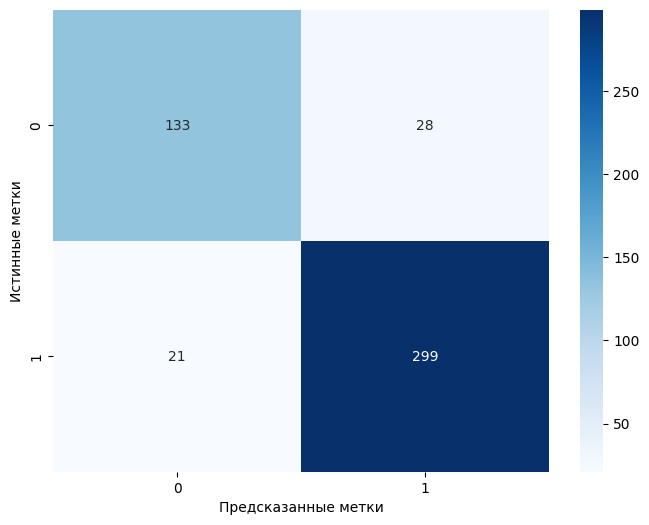

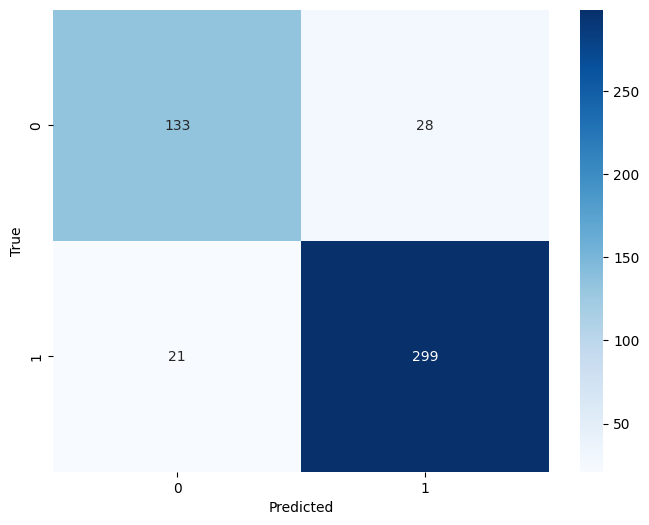

In [89]:
cm_train = confusion_matrix(y_valid, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('')
plt.savefig('lgbm_cm_train.png', dpi=1000)
plt.show()

cm_train = confusion_matrix(y_valid, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('')
plt.savefig('lgbm_cm_train.png', dpi=1000)
plt.show()

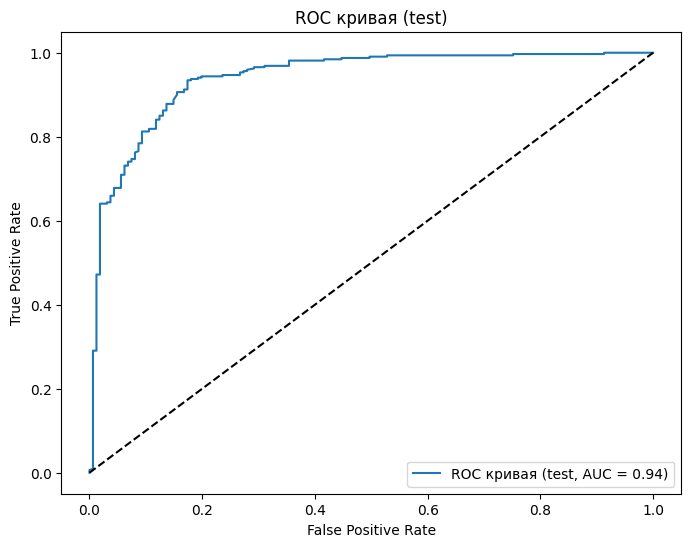

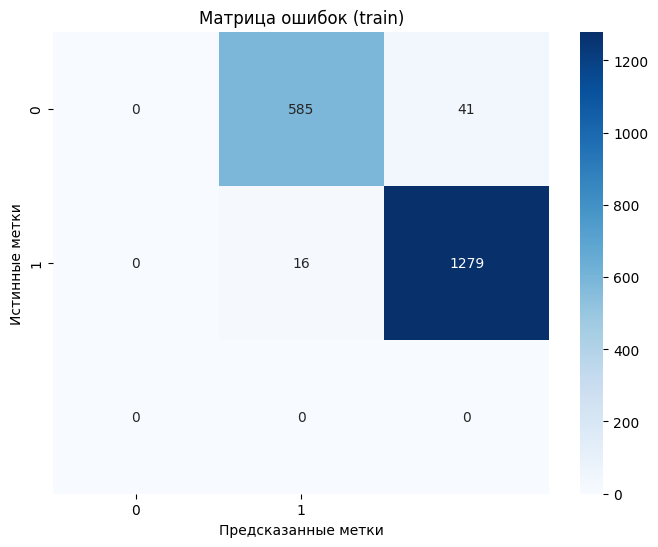

Done


In [87]:
y_train_binary = np.where(y_train == 1, 0, 1)
y_valid_binary = np.where(y_valid == 1, 0, 1)
roc_auc_test = roc_auc_score(y_valid_binary, y_pred_prob_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_valid_binary, y_pred_prob_test)
# 1. ROC кривая и AUC для train
roc_auc_train = roc_auc_score(y_train_binary, y_pred_prob_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_binary, y_pred_prob_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC curve (train, AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'ROC curve (test, AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ')
plt.legend(loc='lower right')
plt.savefig('lgbm_roc_train.png', dpi=1000)
plt.show()


# 2. ROC кривая и AUC для test

fpr_test, tpr_test, thresholds_test = roc_curve(y_valid_binary, y_pred_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'ROC кривая (test, AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая (test)')
plt.legend(loc='lower right')
plt.savefig('lgbm_roc_test.png', dpi=1000)
plt.show()

# 3. Confusion matrix для train
cm_train = confusion_matrix(y_train_binary, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок (train)')
plt.savefig('lgbm_cm_train.png', dpi=1000)
plt.show()
y_train_binary = np.where(y_train == 1, 0, 1)
y_valid_binary = np.where(y_valid == 1, 0, 1)
cm_train = confusion_matrix(y_train_binary, y_pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок (train)')
plt.savefig('lgbm_cm_train.png', dpi=1000)
plt.show()



print('Done')

In [88]:
cm_train

array([[   0,  585,   41],
       [   0,   16, 1279],
       [   0,    0,    0]], dtype=int64)